In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Model
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler

mpl.rcParams['figure.figsize']=(10,8)
mpl.rcParams['axes.grid']=False

In [2]:
import pandas as pd

In [3]:
df_train=pd.read_csv(r'C:\Users\DELL\Desktop\Data Science\Projects\Anomaly_detection\ECG5000\ECG5000_TRAIN.txt',sep='  ',header=None)   

C:\Users\DELL\AppData\Local\Temp\ipykernel_5016\3867471261.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_train=pd.read_csv(r'C:\Users\DELL\Desktop\Data Science\Projects\Anomaly_detection\ECG5000\ECG5000_TRAIN.txt',sep='  ',header=None)


In [4]:
df_test=pd.read_csv(r'C:\Users\DELL\Desktop\Data Science\Projects\Anomaly_detection\ECG5000\ECG5000_TEST.txt',sep='  ',header=None)   

C:\Users\DELL\AppData\Local\Temp\ipykernel_5016\3269722986.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_test=pd.read_csv(r'C:\Users\DELL\Desktop\Data Science\Projects\Anomaly_detection\ECG5000\ECG5000_TEST.txt',sep='  ',header=None)


In [5]:
df=pd.concat([df_train,df_test])

In [6]:
df_train.shape

(500, 141)

In [7]:
df_test.shape

(4500, 141)

In [8]:
df.shape

(5000, 141)

In [9]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,1.0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,...,0.160348,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137
1,1.0,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,...,0.560327,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250
2,1.0,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,...,1.284825,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797
3,1.0,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,...,0.491173,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564
4,1.0,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,...,0.966606,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456


In [10]:
df.reset_index(drop=True,inplace=True)

In [11]:
df

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,1.0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,...,0.160348,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137
1,1.0,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,...,0.560327,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250
2,1.0,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,...,1.284825,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797
3,1.0,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,...,0.491173,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564
4,1.0,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,...,0.966606,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4.0,-1.122969,-2.252925,-2.867628,-3.358605,-3.167849,-2.638360,-1.664162,-0.935655,-0.866953,...,0.205543,-0.472419,-1.310147,-2.029521,-3.221294,-4.176790,-4.009720,-2.874136,-2.008369,-1.808334
4996,2.0,-0.547705,-1.889545,-2.839779,-3.457912,-3.929149,-3.966026,-3.492560,-2.695270,-1.849691,...,1.218185,1.258419,1.907530,2.280888,1.895242,1.437702,1.193433,1.261335,1.150449,0.804932
4997,2.0,-1.351779,-2.209006,-2.520225,-3.061475,-3.065141,-3.030739,-2.622720,-2.044092,-1.295874,...,-0.896575,-1.512234,-2.076075,-2.586042,-3.322799,-3.627311,-3.437038,-2.260023,-1.577823,-0.684531
4998,2.0,-1.124432,-1.905039,-2.192707,-2.904320,-2.900722,-2.761252,-2.569705,-2.043893,-1.490538,...,-2.495989,-2.821782,-3.268355,-3.634981,-3.168765,-2.245878,-1.262260,-0.443307,-0.559769,0.108568


In [12]:
df.columns

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140],
      dtype='int64', length=141)

In [15]:
df=df.add_prefix('c')

In [16]:
df['c0'].value_counts()

c0
1.0    2919
2.0    1767
4.0     194
3.0      96
5.0      24
Name: count, dtype: int64

In [17]:
df.describe()

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c131,c132,c133,c134,c135,c136,c137,c138,c139,c140
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.527400,-0.262476,-1.649511,-2.492211,-3.119443,-3.167438,-2.866308,-2.273126,-1.798127,-1.410124,...,0.146319,0.070973,-0.062914,-0.276206,-0.507667,-0.761043,-0.834741,-0.642263,-0.487242,-0.706008
std,0.760372,1.152369,1.445493,1.386409,1.302802,1.104382,0.906133,0.731627,0.623100,0.637149,...,1.171299,1.404842,1.646585,1.895134,2.059758,2.086218,2.056220,1.859296,1.830987,1.414465
min,1.000000,-6.729499,-7.090374,-5.132459,-5.363241,-5.375715,-5.330194,-4.782240,-4.311288,-4.071361,...,-3.971715,-4.167040,-4.557576,-4.530488,-4.563270,-5.150100,-4.880460,-5.496107,-5.880890,-6.092227
25%,1.000000,-1.004511,-2.701576,-3.668096,-4.227247,-4.007470,-3.480479,-2.779941,-2.165851,-1.774124,...,-0.655753,-1.089300,-1.588885,-2.147449,-2.731550,-3.030509,-2.868331,-2.153513,-1.657771,-1.596692
50%,1.000000,-0.297541,-1.661892,-2.585677,-3.387934,-3.468718,-2.947061,-2.285578,-1.750157,-1.422570,...,0.473642,0.658318,0.717808,0.604747,0.334857,-0.030767,-0.195151,-0.194423,-0.160262,-0.565588
75%,2.000000,0.500061,-0.677290,-1.513964,-2.235369,-2.530967,-2.398813,-1.823494,-1.484923,-1.063708,...,1.062134,1.169420,1.238687,1.264471,1.234433,1.034584,0.945237,0.951681,1.002692,0.272012
max,5.000000,4.966414,3.479689,2.660597,1.899798,2.147015,1.614375,1.868728,1.804251,1.683730,...,2.960969,3.007606,2.854680,2.912394,2.937685,3.351437,3.432519,3.579448,4.425976,7.402103


In [27]:
train_data,test_data,train_labels,test_label=train_test_split(df.values,df.values[:,0:1],test_size=0.2,random_state=11)

In [28]:
scaler=MinMaxScaler()
data_scaled=scaler.fit(train_data)

In [29]:
train_data_scaled=data_scaled.transform(train_data)
test_data_scaled=data_scaled.transform(test_data)

In [30]:
train_data_scaled

array([[0.25      , 0.5653545 , 0.60136988, ..., 0.20930567, 0.32997796,
        0.29677041],
       [0.        , 0.53651011, 0.4304326 , ..., 0.64401799, 0.51100297,
        0.26357987],
       [0.        , 0.83529635, 0.85518712, ..., 0.68819794, 0.62106844,
        0.53384986],
       ...,
       [0.25      , 0.65888121, 0.63750011, ..., 0.42744179, 0.51056172,
        0.5001256 ],
       [0.25      , 0.44589078, 0.44206445, ..., 0.46460861, 0.50367156,
        0.468176  ],
       [0.        , 0.48027893, 0.42882982, ..., 0.40939336, 0.49784711,
        0.36985404]])

In [31]:
normal_train_data=pd.DataFrame(train_data_scaled).add_prefix('c').query('c0==0').values[:,1:]
anomaly_train_data=pd.DataFrame(train_data_scaled).add_prefix('c').query('c0>0').values[:,1:]

In [32]:
normal_test_data=pd.DataFrame(test_data_scaled).add_prefix('c').query('c0==0').values[:,1:]
anomaly_test_data=pd.DataFrame(test_data_scaled).add_prefix('c').query('c0>0').values[:,1:]

In [35]:
normal_train_data.shape

(2331, 140)

In [34]:
normal_test_data.shape

(588, 140)

In [36]:
anomaly_train_data.shape

(1669, 140)

In [37]:
anomaly_test_data.shape

(412, 140)

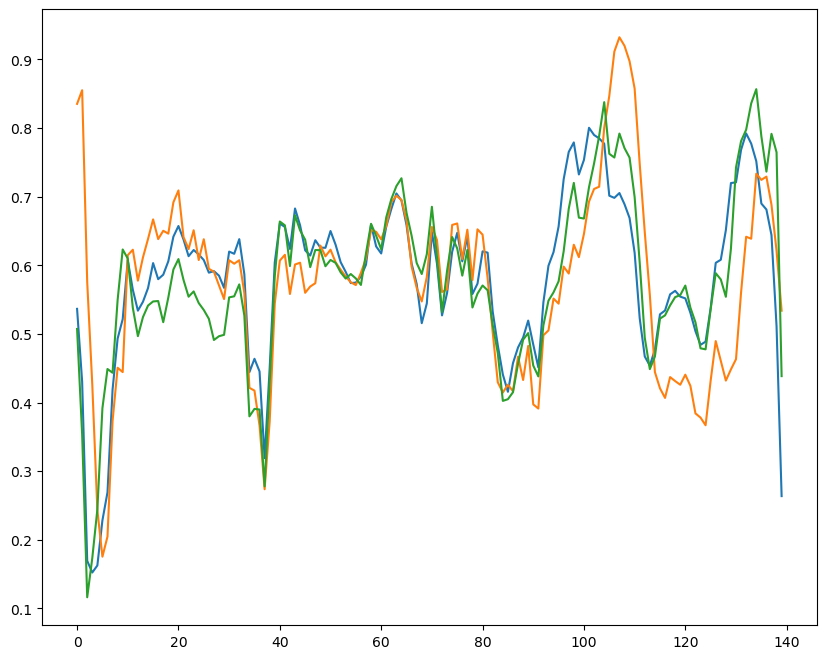

In [48]:
# Normal Data Pattren
plt.plot(normal_train_data[0])
plt.plot(normal_train_data[1])
plt.plot(normal_train_data[2])


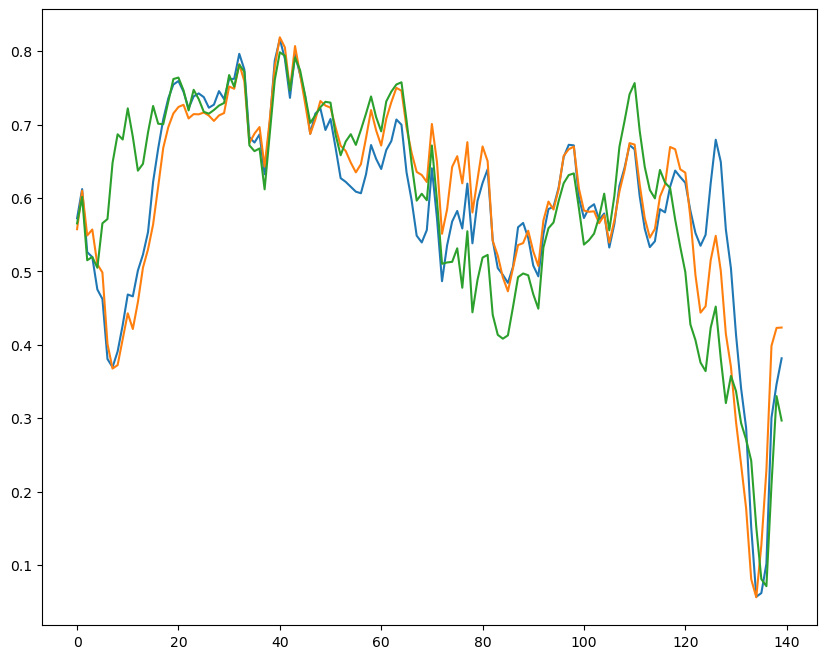

In [49]:
plt.plot(anomaly_train_data[2])
plt.plot(anomaly_train_data[1])
plt.plot(anomaly_train_data[0])

In [66]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dense(16,activation='relu'))
model.add(tf.keras.layers.Dense(8,activation='relu'))
model.add(tf.keras.layers.Dense(16,activation='relu'))
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(140,activation='sigmoid'))

In [67]:
model=AutoEncoder().call()
early_stoping=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=2,mode='min')
model.compile(optimizer='adam',loss='mae')

In [68]:
history=model.fit(normal_train_data,normal_train_data,
                 epochs=50,
                 batch_size=128,
                  validation_data=(train_data_scaled[:,1:],train_data_scaled[:,1:]),
                  shuffle=True,
                  callbacks=[early_stoping]
                 )

Epoch 1/50
19/19 [==============================] - 4s 29ms/step - loss: 0.1097 - val_loss: 0.0981
Epoch 2/50
19/19 [==============================] - 0s 10ms/step - loss: 0.0658 - val_loss: 0.0775
Epoch 3/50
19/19 [==============================] - 0s 10ms/step - loss: 0.0493 - val_loss: 0.0761
Epoch 4/50
19/19 [==============================] - 0s 10ms/step - loss: 0.0472 - val_loss: 0.0755
Epoch 5/50
19/19 [==============================] - 0s 11ms/step - loss: 0.0468 - val_loss: 0.0743
Epoch 6/50
19/19 [==============================] - 0s 10ms/step - loss: 0.0466 - val_loss: 0.0742
Epoch 7/50
19/19 [==============================] - 0s 10ms/step - loss: 0.0465 - val_loss: 0.0741
Epoch 8/50
19/19 [==============================] - 0s 10ms/step - loss: 0.0464 - val_loss: 0.0736
Epoch 9/50
19/19 [==============================] - 0s 10ms/step - loss: 0.0462 - val_loss: 0.0734
Epoch 10/50
19/19 [==============================] - 0s 10ms/step - loss: 0.0458 - val_loss: 0.0719
Epoch 11/

In [69]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 64)                9024      
                                                                 
 dense_42 (Dense)            (None, 32)                2080      
                                                                 
 dense_43 (Dense)            (None, 16)                528       
                                                                 
 dense_44 (Dense)            (None, 8)                 136       
                                                                 
 dense_45 (Dense)            (None, 16)                144       
                                                                 
 dense_46 (Dense)            (None, 32)                544       
                                                                 
 dense_47 (Dense)            (None, 64)              

In [77]:
model_out=model.predict(normal_test_data)

19/19 [==============================] - 0s 2ms/step


In [78]:
model_out.shape

(588, 140)

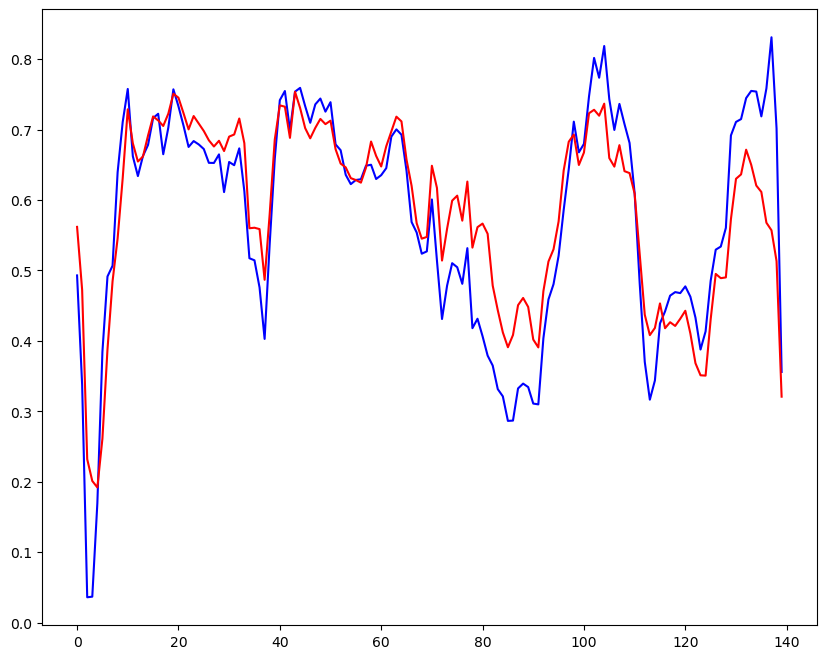

In [80]:
plt.plot(normal_test_data[0],'b')
plt.plot(model_out[0],'r')

In [83]:
out_a=model.predict(anomaly_test_data)

13/13 [==============================] - 0s 2ms/step


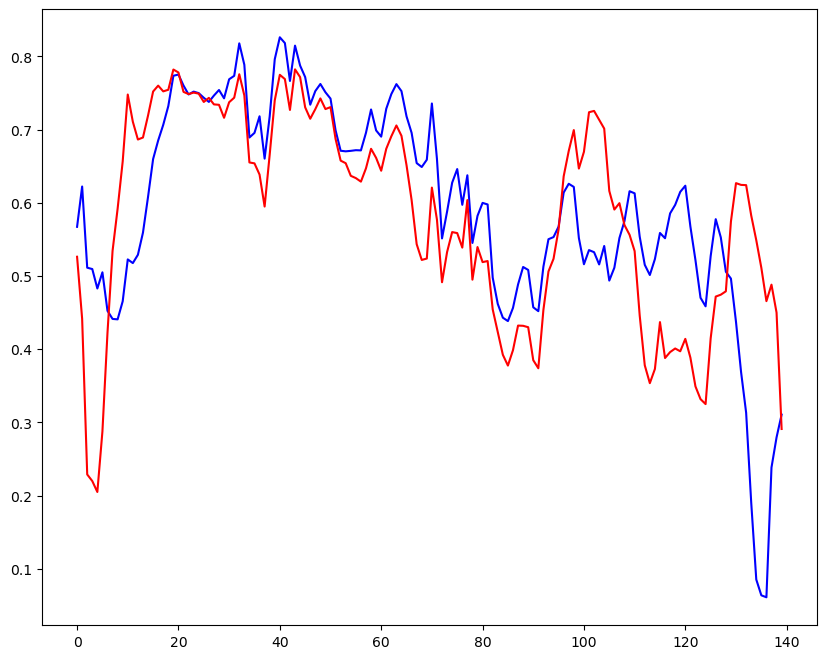

In [84]:
plt.plot(anomaly_test_data[0],'b')
plt.plot(out_a[0],'r')

In [100]:
reconstructions=model.predict(normal_test_data)
train_loss=tf.keras.losses.mae(reconstructions,normal_test_data)

19/19 [==============================] - 0s 2ms/step


In [93]:
train_loss

<tf.Tensor: shape=(588,), dtype=float64, numpy=
array([0.05748437, 0.04238696, 0.04572056, 0.03851788, 0.04256288,
       0.02941427, 0.02044947, 0.03067792, 0.02878336, 0.02818608,
       0.02512172, 0.03190157, 0.02401964, 0.03840908, 0.04510787,
       0.03013988, 0.01972997, 0.03102058, 0.03277746, 0.03546931,
       0.02450698, 0.02781082, 0.02061933, 0.0432622 , 0.0153853 ,
       0.06133923, 0.01733469, 0.02920752, 0.0321921 , 0.09851266,
       0.02029308, 0.06516866, 0.02670629, 0.03531498, 0.0161827 ,
       0.01779802, 0.02379184, 0.02862853, 0.0192893 , 0.03815936,
       0.02483324, 0.02941829, 0.02946589, 0.03979221, 0.035274  ,
       0.04787096, 0.02499298, 0.0276398 , 0.02438159, 0.02112667,
       0.02513536, 0.01932964, 0.04113989, 0.03125273, 0.04202956,
       0.03098644, 0.03539647, 0.04485849, 0.02790803, 0.01901867,
       0.03227849, 0.02145075, 0.02203761, 0.02254186, 0.02295541,
       0.04042888, 0.04901074, 0.02372092, 0.02828897, 0.04200521,
       0.06466

(array([ 3., 27., 50., 46., 85., 67., 52., 40., 46., 27., 29., 27., 15.,
        16.,  8.,  7.,  6.,  4.,  5.,  1.,  7.,  2.,  5.,  1.,  3.,  0.,
         0.,  2.,  0.,  0.,  1.,  0.,  1.,  2.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.01142739, 0.01406467, 0.01670196, 0.01933924, 0.02197653,
        0.02461381, 0.02725109, 0.02988838, 0.03252566, 0.03516294,
        0.03780023, 0.04043751, 0.0430748 , 0.04571208, 0.04834936,
        0.05098665, 0.05362393, 0.05626122, 0.0588985 , 0.06153578,
        0.06417307, 0.06681035, 0.06944764, 0.07208492, 0.0747222 ,
        0.07735949, 0.07999677, 0.08263406, 0.08527134, 0.08790862,
        0.09054591, 0.09318319, 0.09582048, 0.09845776, 0.10109504,
        0.10373233, 0.10636961, 0.1090069 , 0.11164418, 0.11428146,
        0.11691875, 0.11955603, 0.12219331, 0.1248306 , 0.12746788,
        0.13010517, 0.13274245, 0.13537973, 0.13801702, 0.1406543 ,
        0.14329159]),
 <BarContainer

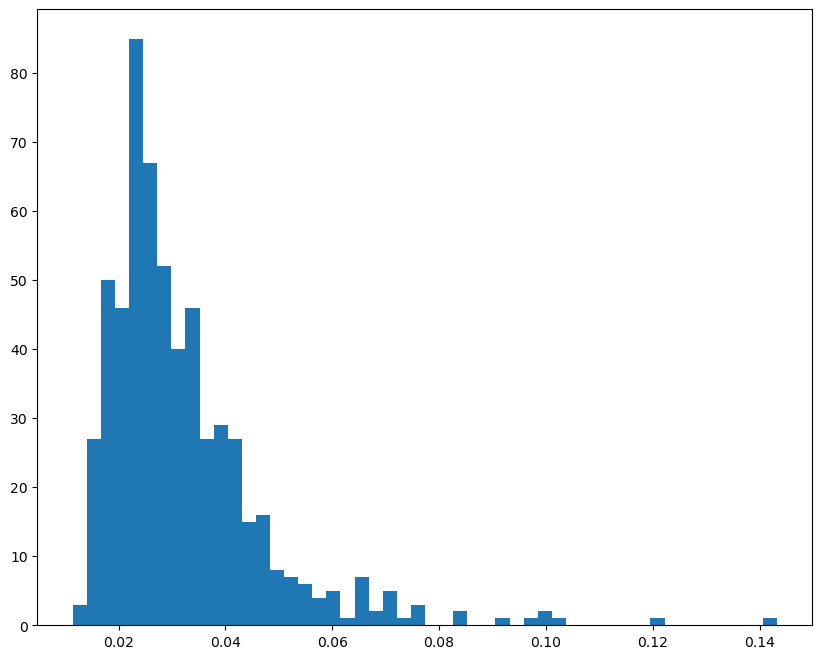

In [87]:
plt.hist(train_loss,bins=50)

In [94]:
np.mean(train_loss)

0.032036082567839616

In [95]:
np.std(train_loss)

0.015082449053839722

In [96]:
threshold=np.mean(train_loss)+2*np.std(train_loss)

In [97]:
threshold

0.06220098067551906

In [99]:
reconstructions_a=model.predict(anomaly_test_data)
train_loss_a=tf.keras.losses.mae(reconstructions_a,anomaly_test_data)

13/13 [==============================] - 0s 2ms/step


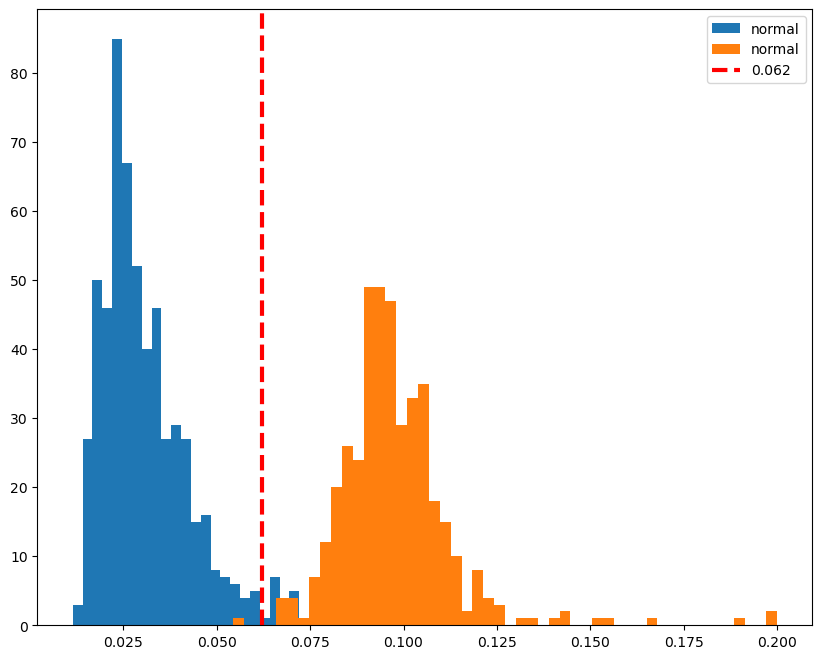

In [102]:
plt.hist(train_loss,bins=50,label='normal')
plt.hist(train_loss_a,bins=50,label='normal')
plt.axvline(threshold,color='r',linewidth=3,linestyle='dashed',label='{:0.3f}'.format(threshold))
plt.legend(loc='upper right')
plt.show()

In [103]:
np.mean(train_loss_a)

0.09757111848754775

In [104]:
np.std(train_loss_a)

0.015577111419244555

In [106]:
preds=tf.math.less(train_loss,threshold)

In [107]:
preds.shape

TensorShape([588])

In [111]:
threshold

0.06220098067551906

In [112]:
train_loss_a

<tf.Tensor: shape=(412,), dtype=float64, numpy=
array([0.0962086 , 0.09804898, 0.10901203, 0.07566   , 0.08961544,
       0.20005387, 0.10723597, 0.10329104, 0.12243652, 0.090901  ,
       0.09027126, 0.09844846, 0.08631676, 0.09265268, 0.10289812,
       0.09217609, 0.09528954, 0.10415439, 0.09826375, 0.10434887,
       0.06721688, 0.08391616, 0.09634625, 0.0902904 , 0.09091987,
       0.0947476 , 0.08665343, 0.08105289, 0.09313612, 0.09325599,
       0.09035507, 0.09039141, 0.09596016, 0.10123528, 0.09334039,
       0.09154772, 0.09629611, 0.1014264 , 0.0960113 , 0.08552229,
       0.09946471, 0.10564706, 0.05432028, 0.09084269, 0.09936368,
       0.09230157, 0.09281928, 0.08842432, 0.09724062, 0.09767128,
       0.09015506, 0.10390417, 0.09177015, 0.08436233, 0.08891471,
       0.10767114, 0.09334634, 0.10479636, 0.09001683, 0.09726342,
       0.09520329, 0.09747333, 0.08140162, 0.09729431, 0.12013386,
       0.10284336, 0.12137374, 0.10000583, 0.1097364 , 0.09334048,
       0.08487

In [108]:
preds_a=tf.math.greater(train_loss_a,threshold)

In [109]:
tf.math.count_nonzero(preds_a)

<tf.Tensor: shape=(), dtype=int64, numpy=411>

In [113]:
preds_a.shape

TensorShape([412])